In [1]:
#!/usr/bin/env python3.6
# -*- coding: utf-8 -*-

In [2]:
# Imports
import sys
import joblib
import numpy as np
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [3]:
#np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [4]:
%matplotlib inline

In [5]:
%store -r X_relative_footsteps_acc
%store -r Y_relative_footsteps_acc
print(X_relative_footsteps_acc.shape)
print(Y_relative_footsteps_acc.shape)

(21881, 28)
(21881, 8)


# Multivariate Linear Regression (Foot prediction)

In [6]:
import sklearn
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [7]:
# Entries where RL is supporting
idxs = np.where(X_relative_footsteps_acc[:, 23] == 0)[0]
X_relative_footsteps_acc_RL_support = X_relative_footsteps_acc[idxs]
Y_relative_footsteps_acc_RL_support = Y_relative_footsteps_acc[idxs]

## Predict RL foot -> x

In [8]:
X_relative_footsteps_acc_RL_support[0, :]

array([ 0.1       ,  0.        ,  0.        ,  0.04003644, -0.06632428,
        0.05440154,  0.00439207,  0.02899047,  0.02653936,  0.22664036,
        0.18001143, -0.4086564 ,  0.23994108, -0.16991884, -0.40835668,
       -0.2385218 ,  0.16382314, -0.41169444, -0.25160387, -0.15317046,
       -0.41252498,  1.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ])

In [9]:
Y_relative_footsteps_acc_RL_support[0, :]

array([ 0.22800851,  0.17177425,  0.23270544, -0.17693889, -0.24620022,
        0.1547656 , -0.24999362, -0.16156544])

### Linear Regression

In [16]:
# Input
X = np.hstack((X_relative_footsteps_acc_RL_support[:, :3], # prev velocity command
               X_relative_footsteps_acc_RL_support[:, -3:], # commanded velocity command
               X_relative_footsteps_acc_RL_support[:, 9:11], # FL (x,y) position
               X_relative_footsteps_acc_RL_support[:, 12:14], # FR (x,y) position
               X_relative_footsteps_acc_RL_support[:, 15:17], # RL (x,y) position
               X_relative_footsteps_acc_RL_support[:, 18:20])) # RR (x,y) position

# Target
Y = np.array([Y_relative_footsteps_acc_RL_support[:, 4]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True)

# Create the model
model_rl_relative_support_x = LinearRegression()

# Fit the model
model_rl_relative_support_x.fit(X_train, Y_train)

# Predict
predictions = model_rl_relative_support_x.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.6556788707349475
RMSE:  0.010668329080130042
The lowest error is:  9.99680050406404e-08
The highest error is:  0.0577821601588534
The avg. error is:  0.007229023088344182


In [17]:
model_rl_relative_support_x.coef_

array([[-0.03921768, -0.04494074, -0.0279131 , -0.0570089 ,  0.00621333,
        -0.01788349,  0.07324121,  0.14763443, -0.76450195,  0.37895452,
         1.18172399,  0.04110233, -0.20522942, -0.06600843]])

In [18]:
model_rl_relative_support_x.intercept_

array([0.1762453])

Text(0, 0.5, 'Predictions')

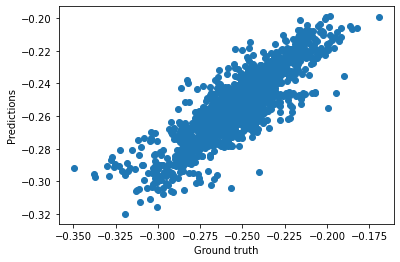

In [19]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [20]:
#%store model_rl_relative_support_x

In [21]:
#for idx, prediction in enumerate(predictions):
#    print(f'Start: {X_test[idx, 6]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [22]:
# Save model
#joblib.dump(model_rl_relative_support_x, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_rl_relative_support_x.sav")

### Predict FL foot -> y

In [39]:
# Input
X = np.hstack((X_relative_footsteps_acc_RL_support[:, :3], # prev velocity command
               X_relative_footsteps_acc_RL_support[:, -3:], # commanded velocity command
               X_relative_footsteps_acc_RL_support[:, 9:11], # FL (x,y) position
               X_relative_footsteps_acc_RL_support[:, 12:14], # FR (x,y) position
               X_relative_footsteps_acc_RL_support[:, 15:17], # RL (x,y) position
               X_relative_footsteps_acc_RL_support[:, 18:20])) # RR (x,y) position

# Target
Y = np.array([Y_relative_footsteps_acc_RL_support[:, 5]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True)

# Create the model
model_rl_relative_support_y = LinearRegression()

# Fit the model
model_rl_relative_support_y.fit(X_train, Y_train)

# Predict
predictions = model_rl_relative_support_y.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.6997345220529803
RMSE:  0.010914375171372427
The lowest error is:  6.2108331283228235e-06
The highest error is:  0.05502173909012045
The avg. error is:  0.0073655771627662205


In [40]:
model_rl_relative_support_y.coef_

array([[-0.03748126, -0.11253108, -0.06852588,  0.01558387, -0.04145404,
        -0.08317871,  0.2134796 , -0.10217792, -0.16280924, -0.13358949,
         0.36165859,  1.0538261 , -0.28493066, -0.20322749]])

In [41]:
model_rl_relative_support_y.intercept_

array([-0.04353681])

Text(0, 0.5, 'Predictions')

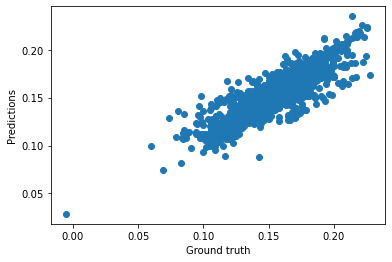

In [42]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [30]:
#%store model_rl_relative_support_y

In [31]:
#for idx, prediction in enumerate(predictions):
#    print(f'Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [32]:
# Save model
#joblib.dump(model_rl_relative_support_y, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_rl_relative_support_y.sav")